# Data

There are some data classes in `kgcnn` that can help to store and load graph data. In principle a graph is a collection of the follwing objects in tensor-form:

* `nodes_attributes`: Node features of shape `(N, F)` where N is the number of nodes and F is the node feature dimension.
* `edge_indices`: Connection list of shape `(M, 2)` where M is the number of edges. The indices denote a connection of incoming or receiving node `i` and outgoing or sending node `j` as `(i, j)`.
* `edges_attributes`: Edge features of shape `(M, F)` where M is the number of edges and F is the edge feature dimension.
* `graph_attributes`: Graph state information of shape `(F, )` where F denotes the feature dimension.

These can be stored in form of numpy arrays in a dictionary type container `GraphDict`. Additional train/test assignment, labels, positions/coordinates, forces or momentum, other connection indices or even symbols or IDs can be added to this dictionary. 

For multiple small graphs a list of these dictionaries serves to represent the common case of datasets for supervised learning tasks, for example small molecules or crystal structures.

## Graph dictionary

Graphs are represented by a dictionary `GraphDict` of (numpy) arrays which behaves like a python dict.

In [12]:
import numpy as np
from kgcnn.data.base import GraphDict
# Single graph.
graph = GraphDict({"edge_indices": np.array([[1, 0], [0, 1]]), "node_label":  np.array([[0], [1]])})
graph.set("graph_labels",  np.array([0]))
graph.set("edge_attributes", np.array([[1.0], [2.0]]));
print({x: v.shape for x,v in graph.items()})

{'edge_indices': (2, 2), 'node_label': (2, 1), 'graph_labels': (1,), 'edge_attributes': (2, 1)}


The class `GraphDict` can be converted to for example a strict graph representation of `networkx` which keeps track of node and edge changes.

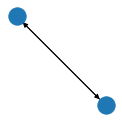

In [30]:
import networkx as nx
import matplotlib.pyplot as plt
nx_graph = graph.to_networkx()
plt.figure(figsize=(1.5,1.5)) 
nx.draw(nx_graph)
plt.show()

Or compiling a dictionary of graph properties in tensorflow from a `networkx` graph.

There are graph pre- and postprocessors in `kgcnn.graph` which take specific properties by name and apply a processing function or transformation. The processing function can for example compute angle indices based on edges or sort edge indices and sort dependent features accordingly. However, they should be used with caution since they only apply to tensor properties regardless of any underlying graph.

In [9]:
from kgcnn.graph.preprocessor import SortEdgeIndices

SortEdgeIndices(edge_indices="edge_indices", edge_attributes="^edge_(?!indices$).*", in_place=True)(graph);


## Datasets

# Loading Options